## <font color='darkblue'>Understand the ML best practice and project roadmap</font>
([article source](https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/)) <font size='3ptx'><b>When a customer wants to implement ML(Machine Learning) for the identified business problem(s) after multiple discussions along with the following stakeholders from both sides – Business, Architect, Infrastructure, Operations, and others. This is quite normal for any new product/application development. </b></font>

But in the ML world, this is quite different. because, for new application development, we have to have a set of requirements in the form of sprint plans or traditional SDLC (Software Development Life Cycle) form and it depends on the customer for the next release plan.

But in ML implementation we need to initiate the below activity first
* <b><font size='3ptx'><a href='#sect1_1'>Identify the data source(s) and Data Collection</a></font></b>
* <b><font size='3ptx'><a href='#sect1_2'>Machine Learning process</a></font></b>

<a id='sect1_1'></a>
### <font color='darkgreen'>Identify the data source(s) and Data Collection</font>
Organization’s key application(s) – it would be Internal or External application or web-sites
It would be streaming data from the web (Twitter/Facebook – any Social media) Once you’re comfortable with the available data, you can start work on the rest of the Machine Learning process model. 

<a id='sect1_2'></a>
### <font color='darkgreen'>Machine Learning process</font>
Let’s jump into the **EDA process** (<font color='brown'>Step 3</font>) in the picture below. In the data preparation, EDA gets most of the effort and unavoidable steps. Will zoom in to this in detail now. Are You READY!!!!

![ML process](images/1.PNG)
<br/>

<a id='sect2'></a>
## <font color='darkblue'>Exploratory Data Analysis(EDA)</font>
* <font size='3ptx'><b><a href='#sect2_1'>1.Dataset Information</a></b></font>
* <font size='3ptx'><b><a href='#sect2_2'>2. Data Cleaning/Wrangling</a></b></font>
* <font size='3ptx'><b><a href='#sect2_3'>3. Group by names</a></b></font>
* <font size='3ptx'><b><a href='#sect2_4'>4. Summary of Statistics </a></b></font>
* <font size='3ptx'><b><a href='#sect2_5'>5. Dealing with Missing Values</a></b></font>
* <font size='3ptx'><b><a href='#sect2_6'>6.Skewness and kurtosis</a></b></font>
* <font size='3ptx'><b><a href='#sect2_7'>7. Categorical variable Move</a></b></font>
* <font size='3ptx'><b><a href='#sect2_8'>8. Create Dummy Variables</a></b></font>
* <font size='3ptx'><b><a href='#sect2_9'>9. Removing Columns</a></b></font>
* <font size='3ptx'><b><a href='#sect2_10'>10. Univariate Analysis</a></b></font>
* <font size='3ptx'><b><a href='#sect2_11'>11. Bivariate Analysis</a></b></font>
* <font size='3ptx'><b><a href='#sect2_12'>12. Multi-Variate Analysis</a></b></font>
* <font size='3ptx'><b><a href='#sect2_13'>13. Distributions of the variables/features</a></b></font>
* <font size='3ptx'><b><a href='#sect2_14'>14. Correlation</a></b></font>
<br/>

<b><font size='3ptx'>What is EDA? [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis): this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. </font></b>

Outcome of this phase as below:
* **Understanding the given dataset** and helps clean up the given dataset.
* It gives you a **clear picture of the features and the relationships between them**.
* Providing guidelines for **essential variables and leaving behind/removing non-essential variables**.
* Handling **Missing values** or human error.
* Identifying **outliers**.
* EDA process would be **maximizing insights of a dataset**.

This process is time-consuming but very effective, the below activities are involved during this phase, **it would be varied and depends on the available data and acceptance from the customer**.

![EDA process](images/2.PNG)
<br/>

Hope now you have some idea, let’s implement all these using the [**Automobile – Predictive Analysis dataset**](https://www.kaggle.com/uciml/autompg-dataset).

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [42]:
%matplotlib inline
# rcParams['figure.figsize'] = (8, 4)

In [2]:
# Loading autompg-dataset
df_cars = pd.read_csv("https://raw.githubusercontent.com/johnklee/kaggle_dataset/main/autompg-dataset/auto-mpg.csv")
df_cars.rename(columns={'model year': 'model_year'}, inplace=True)
df_cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Loading titanic dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/johnklee/kaggle_dataset/main/titanic/train.csv')
titanic_df.sample(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S


<a id='sect2_1'></a>
### <font color='darkgreen'>1.Dataset Information</font>

In [4]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df_cars.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df_cars['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Observation:
* We could see that the features/column/fields and its data type, along with Null count
* `horsepower` contains unexpected value `?` (`horsepower` is our prediction target)

<a id='sect2_2'></a>
### <font color='darkgreen'>2. Data Cleaning/Wrangling</font> ([back](#sect2))
The process of cleaning and unifying messy and complex data sets for easy access and analysis. Action:
* replace(‘?’,’NaN’)
* Converting `horsepower` from Object type into int

In [6]:
# Replace '?' with 'NaN' and change type of `horsepower` to float
df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)

# Fill NaN with mean value
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)

# Change type as int
df_cars.horsepower = df_cars.horsepower.astype(int)

/tmp/ipykernel_690157/1407148852.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)


In [7]:
print("######################################################################")
print("          After Cleaning and type covertion in the Data Set")
print("######################################################################")
df_cars.info()

######################################################################
          After Cleaning and type covertion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [8]:
df_cars['car name'].unique()[:20]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan'], dtype=object)

In [9]:
def word_to_cvector(car_name):
  car_name = car_name.lower()
  char_vector = [0] * 26
  for c in car_name:
    p = ord(c) - 97
    if p < 26 and p >= 0:
      char_vector[p] += 1
  return char_vector
      
car_name_df = pd.DataFrame(
  list(map(lambda car_name: [car_name] + word_to_cvector(car_name), df_cars['car name'].tolist())),
  columns=['car_name'] + list(string.ascii_lowercase))

car_name_df.sample(n=10)

,car_name,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
13,buick estate wagon (sw),2,1,1,0,2,0,1,0,1,...,0,0,2,2,1,0,2,0,0,0
361,toyota cressida,2,0,1,1,1,0,0,0,1,...,0,1,2,2,0,0,0,0,1,0
167,toyota corolla,2,0,1,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,1,0
194,amc hornet,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
14,toyota corona mark ii,3,0,1,0,0,0,0,0,2,...,0,2,0,2,0,0,0,0,1,0
48,ford mustang,1,0,0,1,0,1,1,0,0,...,0,1,1,1,1,0,0,0,0,0
325,vw rabbit c (diesel),1,2,1,1,2,0,0,0,2,...,0,1,1,1,0,1,1,0,0,0
97,plymouth valiant,2,0,0,0,0,0,0,1,1,...,0,0,0,2,1,1,0,0,1,0
94,chrysler new yorker brougham,1,1,1,0,3,0,1,2,0,...,0,5,1,0,1,0,1,0,2,0
381,honda accord,2,0,2,2,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
car_name_features = car_name_df.loc[:, car_name_df.columns!='car_name']
kmeans = KMeans(n_clusters=25, random_state=0).fit(car_name_features)
car_name_df['c'] = kmeans.labels_

In [11]:
set(car_name_df[car_name_df['c']==0].car_name.tolist())

{'amc hornet sportabout (sw)',
 'pontiac astro',
 'toyota carina',
 'toyota celica gt',
 'toyota corolla',
 'toyota corolla 1200',
 'toyota corolla 1600 (sw)',
 'toyota corolla liftback',
 'toyota corolla tercel',
 'toyota corona',
 'toyota corona hardtop',
 'toyota corona liftback',
 'toyota corona mark ii',
 'toyota cressida',
 'toyota mark ii',
 'toyota starlet',
 'toyouta corona mark ii (sw)'}

In [12]:
set(car_name_df[car_name_df['c']==6].car_name.tolist())

{'amc ambassador brougham',
 'amc ambassador dpl',
 'amc ambassador sst',
 'amc matador',
 'amc matador (sw)',
 'amc pacer',
 'amc pacer d/l',
 'datsun 810 maxima',
 'fiat strada custom',
 'maxda rx3',
 'mazda glc',
 'mazda glc 4',
 'mazda glc custom',
 'mazda glc custom l',
 'mazda rx-4',
 'mazda rx-7 gs',
 'mazda rx2 coupe',
 'pontiac safari (sw)'}

Observation:
* `horsepower` is now int type 
* Column `name` is still as an Object type in the given data set and we can observe some misspelling mistakes there.
    * "toyota" -> "toyouta"
    * "mazda" -> "maxda"

<a id='sect2_3'></a>
### <font color='darkgreen'>3. Group by names</font> ([back](#sect2))
Correcting the brand name (<font color='brown'>Since misspelled, we have to correct it</font>)

In [13]:
# Rename column `car name` to `name`
df_cars.rename(columns={'car name': 'name'}, inplace=True)

In [14]:
# Correction on some of the misspelling car name
df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy','chevrolet', regex=True)
df_cars['name'] = df_cars['name'].str.replace('maxda|mazda','mazda', regex=True)
df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes', regex=True)
df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota', regex=True)
df_cars['name'] = df_cars['name'].str.replace('vokswagen|volkswagen|vw','volkswagen', regex=True)

In [15]:
# Show the mean value of each column after grouping by car name
df_cars.groupby(['name']).mean().sample(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
pontiac grand prix lj,16.0,8.0,400.0,180.0,4220.0,11.1,77.0,1.0
ford torino 500,19.0,6.0,250.0,88.0,3302.0,15.5,71.0,1.0
mercedes-benz 240d,30.0,4.0,146.0,67.0,3250.0,21.8,80.0,2.0
datsun 710,28.0,4.0,101.0,79.0,2274.0,18.0,74.5,3.0
volkswagen rabbit l,36.0,4.0,105.0,74.0,1980.0,15.3,82.0,2.0


<a id='sect2_4'></a>
### <font color='darkgreen'>4. Summary of Statistics</font> ([back](#sect2))
<b>The [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.</b> It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [16]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


<a id='sect2_5'></a>
### <font color='darkgreen'>5. Dealing with Missing Values</font> ([back](#sect2))
Fill in the missing values of `horsepower` by mean of `horsepower` value.

In [17]:
meanhp = df_cars['horsepower'].mean()
df_cars['horsepower'] = df_cars['horsepower'].fillna(meanhp)

For more techniques in dealing with missing values, please refer to this article [`7 Ways to Handle Missing Values in Machine Learning`](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)
1. **Deleting Rows with missing values**: Missing values can be handled by deleting the rows or columns having null values.
    * <font color='green'>**Pro**</font>: A model trained with the removal of all missing values creates a robust model.
    * <font color='red'>**Con**</font>: Loss of a lot of information and works poorly if the percentage of missing values is excessive in comparison to the complete dataset.
2. **Impute missing values for continuous variable**: Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column.
3. **Impute missing values for categorical variable**: When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category.
4. **Other Imputation Methods**: For example, for the data variable having longitudinal behavior, it might make sense to use the last valid observation to fill the missing value. This is known as the Last observation carried forward (LOCF) method.
5. **Using Algorithms that support missing values**: The k-NN algorithm can ignore a column from a distance measure when a value is missing. Naive Bayes can also support missing values when making a prediction. These algorithms can be used when the dataset contains null or missing values.
6. **Prediction of missing values**: Using the other features which don’t have nulls can be used to predict missing values.
7. **Imputation using Deep Learning Library — Datawig**: [**Datawig**](https://pypi.org/project/datawig/) is a library that learns ML models using Deep Neural Networks to impute missing values in the datagram.

<a id='sect2_6'></a>
### <font color='darkgreen'>6.Skewness and kurtosis </font> ([back](#sect2))
<b>Most of the paramteric machine learning models like LDA, Linear Regression and mamy more assume that the data is normally distributed</b>. If this assumption fails the model fails to give accurate predictions.

[**Skewness**](https://en.wikipedia.org/wiki/Skewness) tell us about distribution of our data:

![Skewness](images/3.PNG)
<br/>
> The thumb rule is: If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed. And if <b><font color='darkred'>the skewness is less than -1 and greater than +1 then our data is heavily skewed</font></b>.

<br/>

You might have heard that [**kurtosis**](https://en.wikipedia.org/wiki/Kurtosis) tells us about the shape or peakedness or flatness of the distribution but this is not correct. <b>Kurtosis tell us about the tails behaviour. It is actually the measure of outliers present in the distribution</b>.

Kurtosis are of three types:
* <font color='red'>**Mesokurtic**</font>: When the tails of the distibution is similar to the normal distribution then it is mesokurtic. <b>The kutosis for normal distibution is 3</b>.
* <font color='blue'>**Leptokurtic**</font>: If the kurtosis is greater than 3 then it is leptokurtic. In this case, <b>the tails will be heaviour than the normal distribution which means lots of outliers are present in the data</b>. It can be recognized as thin bell shaped distribution with peak higher than normal distribution.
* <font color='green'>**Platykurtic**</font>: Kurtosis will be less than 3 which implies <b>thinner tail or lack of outliers than normal distribution</b>.In case of platykurtic, bell shaped distribution will be broader and peak will be lower than the mesokurtic.

![Kurtosis](images/4.PNG)

In [18]:
print("Skewness: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


<AxesSubplot:ylabel='Frequency'>

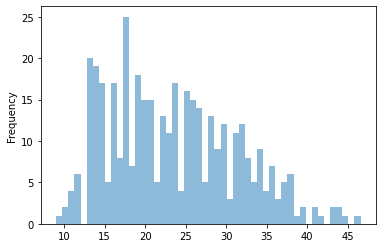

In [19]:
df_cars.mpg.plot.hist(bins=50, alpha=0.5)

<a id='sect2_7'></a>
### <font color='darkgreen'>7. Categorical variable Move</font> ([back](#sect2))
Replacing the categorical variable with actual values

In [20]:
sampe_index = df_cars.sample(n=10).index

In [21]:
df_cars[['horsepower', 'mpg', 'origin']].loc[sampe_index,:]

,horsepower,mpg,origin
367,88,28.0,1
46,72,22.0,1
96,175,13.0,1
284,110,20.6,1
352,65,29.9,1
155,72,15.0,1
49,86,23.0,1
267,95,27.5,3
50,90,28.0,2
348,62,37.7,3


In [22]:
df_cars['origin'] = df_cars['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df_cars[['horsepower', 'mpg', 'origin']].loc[sampe_index,:]

,horsepower,mpg,origin
367,88,28.0,america
46,72,22.0,america
96,175,13.0,america
284,110,20.6,america
352,65,29.9,america
155,72,15.0,america
49,86,23.0,america
267,95,27.5,asia
50,90,28.0,europe
348,62,37.7,asia


<a id='sect2_8'></a>
### <font color='darkgreen'>8. Create Dummy Variables</font> ([back](#sect2))
<b>Values like ‘america’ cannot be read into an equation. So we create 3 simple true or false columns with titles equivalent to “Is this car America?”, “Is this care European?” and “Is this car Asian?”</b> ([one hot encoding](https://en.wikipedia.org/wiki/One-hot)). These will be used as independent variables without imposing any kind of ordering between the three regions. Let’s apply the below code.

In [23]:
df_cars_with_origin_dummy = pd.get_dummies(df_cars, columns=['origin'])
df_cars_with_origin_dummy[
  ['mpg'] + list(filter(lambda c: c.startswith('origin'), df_cars_with_origin_dummy.columns))].sample(n=5)

,mpg,origin_america,origin_asia,origin_europe
201,18.5,1,0,0
249,19.9,1,0,0
87,13.0,1,0,0
347,37.0,0,1,0
38,14.0,1,0,0


There are many approaches to encode the categorical columns becides OHE (<font color='brown'>One-hot encoding</font>) such as:
* **Label Encoding and Ordinal Encoding**: [**LabelEncoder**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) & [**OrdinalEncoder**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder)
* **Target Encoding**: Check [**Category Encoders**](https://contrib.scikit-learn.org/category_encoders/index.html) on [**TargetEncoder**](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
* **Binary Encoding**: Check [**BinaryEncoder**](https://contrib.scikit-learn.org/category_encoders/binary.html?highlight=binaryencoder#category_encoders.binary.BinaryEncoder)
* ...

For reference, you can check this article [`How to Deal with Categorical Data for Machine Learning`](https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html).

<a id='sect2_9'></a>
### <font color='darkgreen'>9. Removing Columns</font> ([back](#sect2))
For this analysis, we won’t be needing the car name feature, so we can drop it.

In [24]:
df_cars_with_origin_dummy = df_cars_with_origin_dummy.drop('name',axis=1)
df_cars_with_origin_dummy.sample(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_america,origin_asia,origin_europe
218,36.0,4,79.0,58,1825,18.6,77,0,0,1
367,28.0,4,112.0,88,2605,19.6,82,1,0,0
47,19.0,6,250.0,100,3282,15.0,71,1,0,0
67,11.0,8,429.0,208,4633,11.0,72,1,0,0
135,18.0,6,225.0,105,3613,16.5,74,1,0,0


<a id='sect2_10'></a>
### <font color='darkgreen'>10. Univariate Analysis</font> ([back](#sect2))
“Uni” + “Variate” formst Univariate, means one variable or feature analysis. <b>The univariate analysis basically tells us how data in each feature is distributed</b>. just sample as below.

In [25]:
titanic_df.sample(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C


#### Histogram
<b>A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns</b>. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

<AxesSubplot:xlabel='Age', ylabel='Count'>

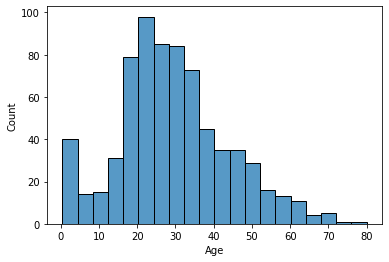

In [26]:
sns.histplot(titanic_df["Age"])

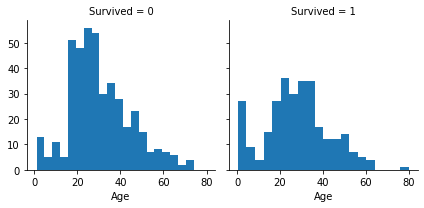

In [27]:
g = sns.FacetGrid(titanic_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Observations**:
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

<br/>

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
* We should consider Age (our assumption classifying #2) in our model training.
* Complete the Age feature for null values (completing #1).
* We should band age groups (creating #3).

#### Bar chart

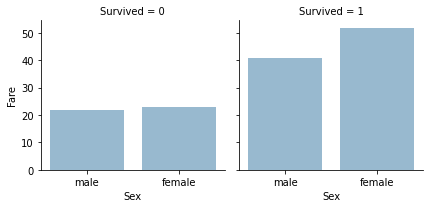

In [28]:
grid = sns.FacetGrid(titanic_df, col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=["male", "female"])
grid.add_legend()

**Observations:**

* `female` has higher survived rate than `male`

**Decisions:**

* `Sex` should be kept as a feature.

<AxesSubplot:>

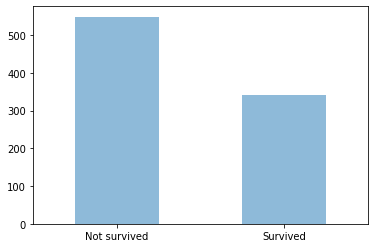

In [29]:
titanic_df.Survived.replace(
  {1:'Survived', 0:'Not survived'}).value_counts().plot(
  kind="bar", alpha=0.5, rot=0)

**Observation**: The labelling is a bit imbalanced.

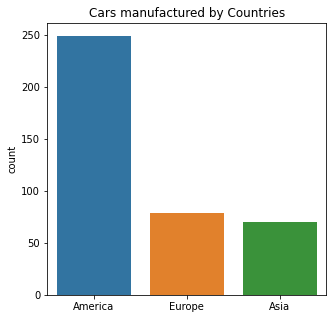

In [30]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_cars.origin.values, data=df_cars)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'America'
labels[1] = 'Europe'
labels[2] = 'Asia'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show()

**Observation**: Most cars are coming from `America` in our dataset

<a id='sect2_11'></a>
### <font color='darkgreen'>11. Bivariate Analysis</font> ([back](#sect2))
“Bi” +“Variate” Bi-variate, means two variables or features are analyzed together, that how they are related to each other. Generally, we use to perform to <b>find the relationship between the dependent and independent variable</b>. Even you can perform this with any two variables/features in the given dataset to understand how they related to each other.

Exploring the range and distribution of numerical Variables ([box plot](https://en.wikipedia.org/wiki/Box_plot), [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution)):

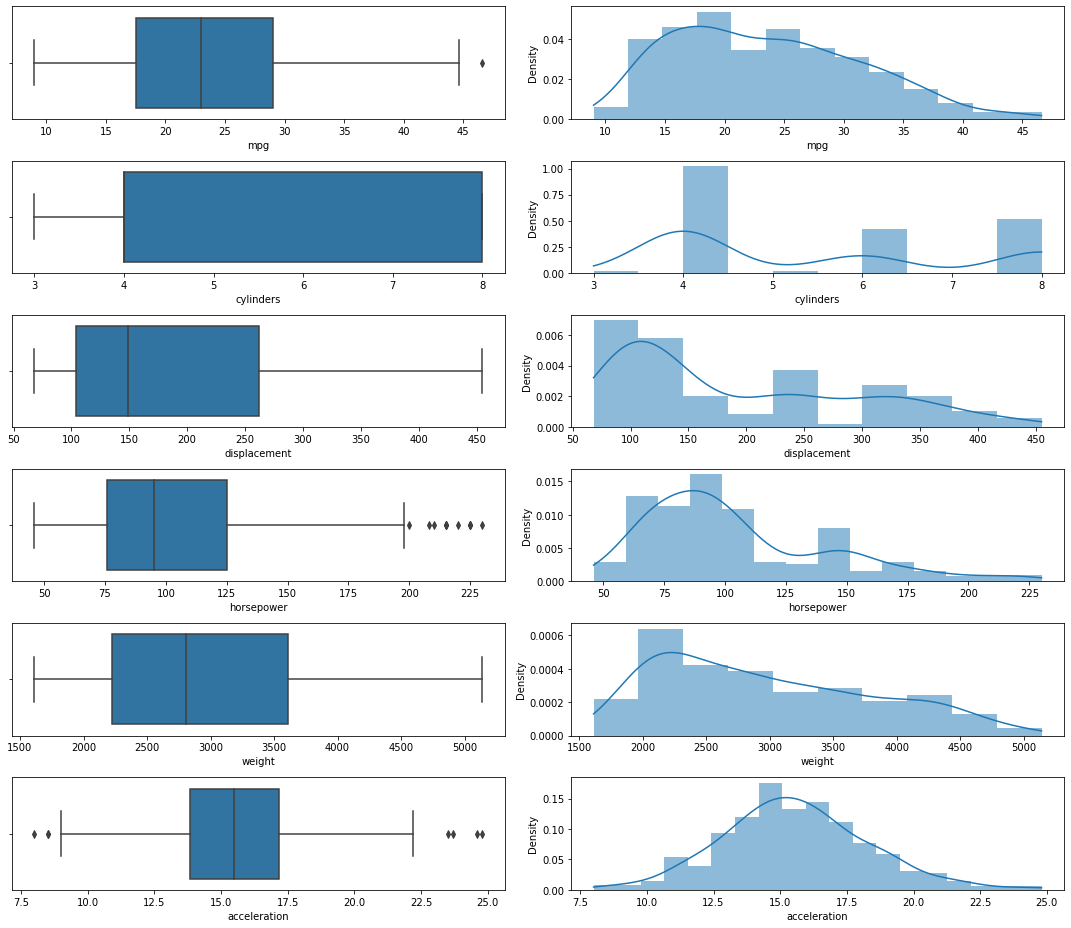

In [31]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
sns.histplot(df_cars['mpg'], ax = ax[0,1], kde=True, stat="density", linewidth=0)
sns.boxplot(x= df_cars["cylinders"], ax = ax[1,0])
sns.histplot(df_cars['cylinders'], ax = ax[1,1], kde=True, stat="density", linewidth=0)
sns.boxplot(x= df_cars["displacement"], ax = ax[2,0])
sns.histplot(df_cars['displacement'], ax = ax[2,1], kde=True, stat="density", linewidth=0)
sns.boxplot(x= df_cars["horsepower"], ax = ax[3,0])
sns.histplot(df_cars['horsepower'], ax = ax[3,1], kde=True, stat="density", linewidth=0)
sns.boxplot(x= df_cars["weight"], ax = ax[4,0])
sns.histplot(df_cars['weight'], ax = ax[4,1], kde=True, stat="density", linewidth=0)
sns.boxplot(x= df_cars["acceleration"], ax = ax[5,0])
sns.histplot(df_cars['acceleration'], ax = ax[5,1], kde=True, stat="density", linewidth=0)
plt.tight_layout()

Plot Numerical Variables:

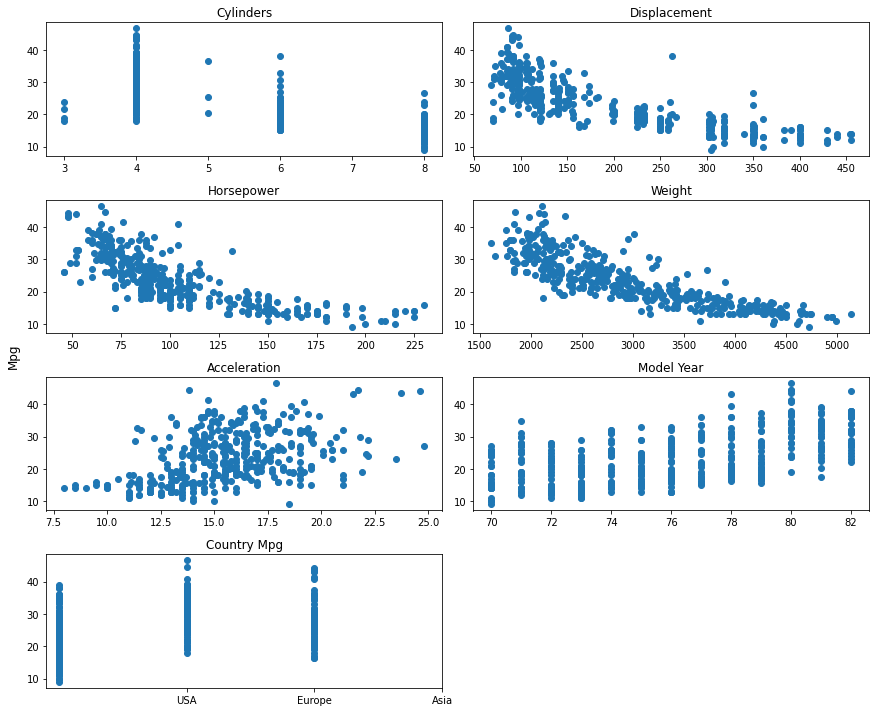

In [32]:
f, ax_arr = plt.subplots(4,2, figsize=(12,10))
mpgval = df_cars.mpg.values
ax_arr[0,0].scatter(df_cars.cylinders.values, mpgval)
ax_arr[0,0].set_title('Cylinders')
ax_arr[0,1].scatter(df_cars.displacement.values, mpgval)
ax_arr[0,1].set_title('Displacement')
ax_arr[1,0].scatter(df_cars.horsepower.values, mpgval)
ax_arr[1,0].set_title('Horsepower')
ax_arr[1,1].scatter(df_cars.weight.values, mpgval)
ax_arr[1,1].set_title('Weight')
ax_arr[2,0].scatter(df_cars.acceleration.values, mpgval)
ax_arr[2,0].set_title('Acceleration')
ax_arr[2,1].scatter(df_cars["model_year"].values, mpgval)
ax_arr[2,1].set_title('Model Year')
ax_arr[3,0].scatter(df_cars.origin.values, mpgval)
ax_arr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
ax_arr[3,0].set_xticks([1,2,3])
ax_arr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
ax_arr[3,1].axis("off")
f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

**Observation:**
* Well nobody manufactures 7 cylinders. Why…Does anyone know?
* 4 cylinder has better mileage performance than other and most manufactured ones.
* 8 cylinder engines have a low mileage count… of course, they focus more on pickup( fast cars).
* 5 cylinders, performance-wise, compete none neither 4 cylinders nor 6 cylinders.
* Displacement, weight, horsepower are inversely related to mileage.
* More horsepower means low mileage. (`Mpg` vs `Displacement`)
* Year on Year Manufacturers has focussed on increasing the mileage of the engines.
* Cars manufactured in Japan majorly focus more on mileage.

<a id='sect2_12'></a>
### <font color='darkgreen'>12. Multi-Variate Analysis</font> ([back](#sect2))
Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2. Ex:- Pair plot and 3D scatter plot.

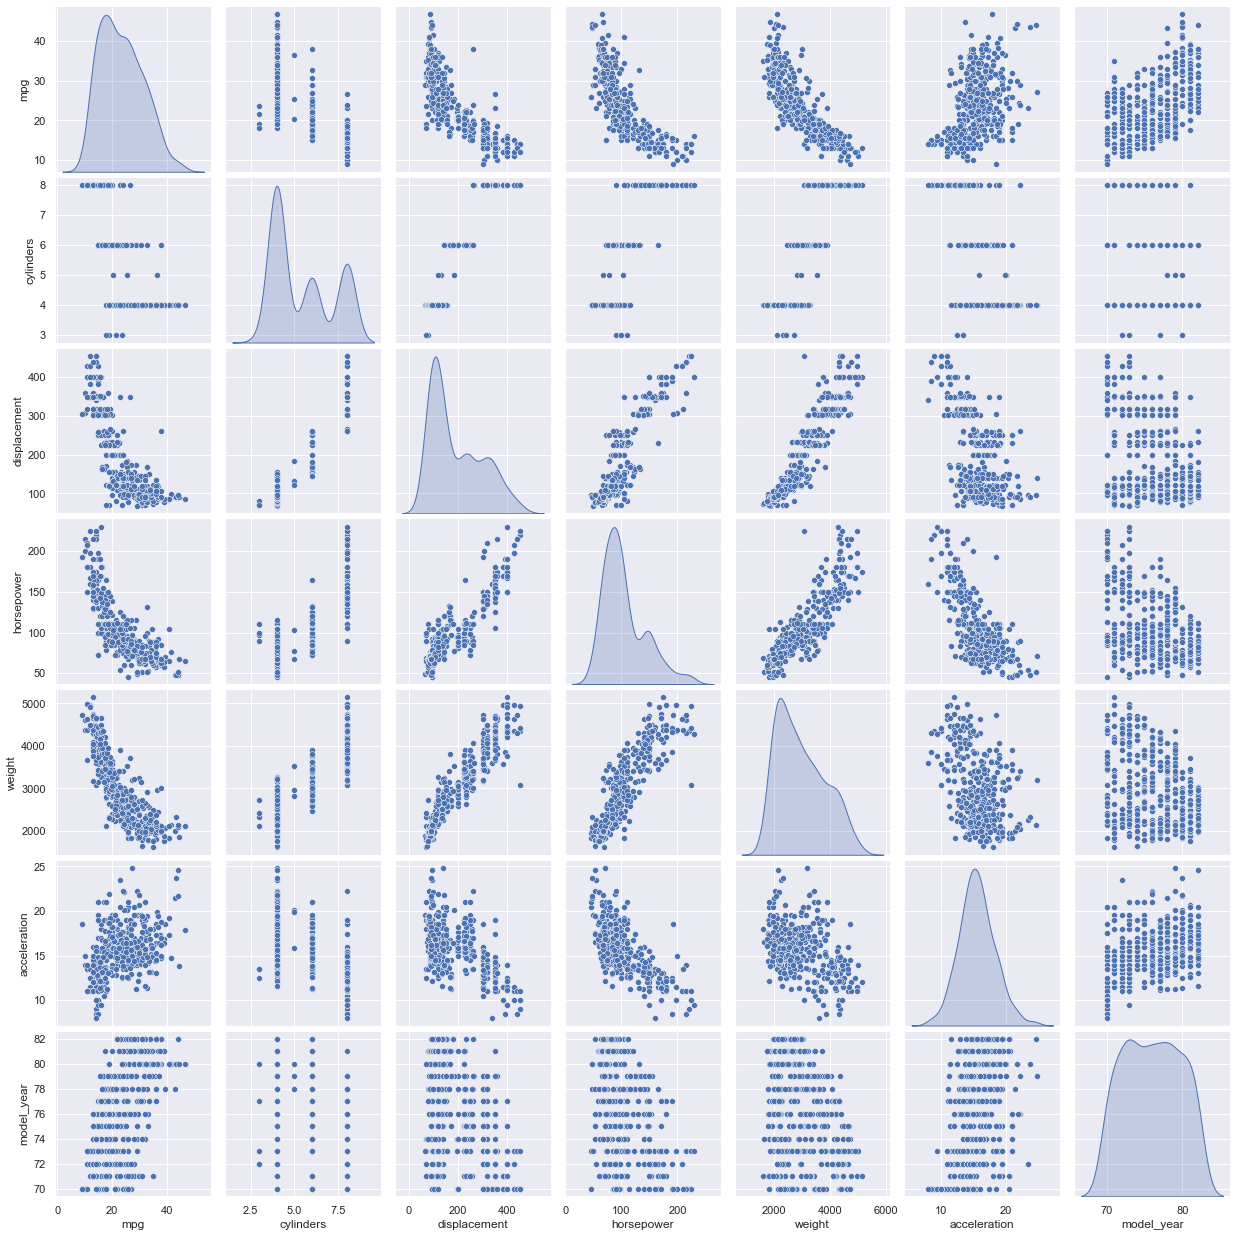

In [35]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
partial_attr_df = df_cars.iloc[:, 0:7]
sns.pairplot(partial_attr_df, diag_kind='kde')   

**Observation**:
* Between `mpg` and other attributes indicates the relationship is not really linear. 
* However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. 
* Several assumptions of classical linear regression seem to be violated, including the assumption of no [Heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity)

<a id='sect2_13'></a>
### <font color='darkgreen'>13. Distributions of the variables/features</font> ([back](#sect2))

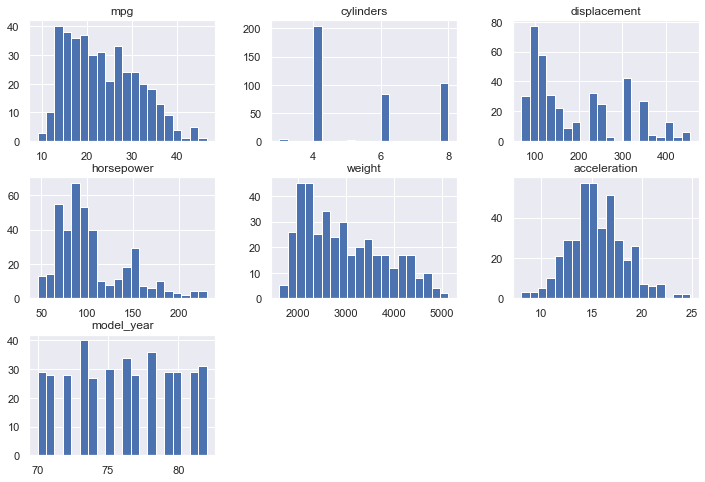

In [36]:
df_cars.hist(figsize=(12,8),bins=20)
plt.show()

**Observation:**
* The acceleration of the cars in the data is normally distributed and most of the cars have an acceleration of 15 meters per second squared.
* Half of the total number of cars (51.3%) in the data has 4 cylinders.
* Our output/dependent variable (`mpg`) is slightly skewed to the right.

<a id='sect2_14'></a>
### <font color='darkgreen'>14. Correlation</font> ([back](#sect2))
[**Correlation does not imply causation!!!**](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)
> The phrase "correlation does not imply causation" refers to the inability to legitimately deduce a cause-and-effect relationship between two events or variables solely on the basis of an observed association or correlation between them.

* <b>根據統計: 穿著鞋子睡覺與醒來時頭痛密切相關。因此，穿著鞋子睡覺會引起頭痛?</b> 一個更合理的解釋是，兩者都是由第三個因素引起的，在這種情況下是醉酒睡覺，從而產生了相關性。所以結論是錯誤的。
* <b>根據統計:隨著冰淇淋銷量的增加，溺水死亡率急劇上升。因此，食用冰淇淋會導致溺水?</b> 在炎熱的夏季，冰淇淋的銷售量比在寒冷的時候高得多，而且正是在炎熱的夏季，人們更有可能從事涉及水的活動，例如游泳。溺水死亡人數的增加僅僅是由於更多地接觸以水為基礎的活動，而不是冰淇淋。陳述的結論是錯誤的。

#### Pearson Correlation Coefficient
In statistics, the [**Pearson correlation coefficient**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)  is a measure of linear correlation between two sets of data. It is the ratio between the [covariance](https://en.wikipedia.org/wiki/Covariance) of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. 

* R=1: Strong positive relationship
* R=0: Not linearly correlated
* R=-1: Strong negative relationship

![Pearson correlation coefficient](images/5.PNG)
<br/>

The Pearson Correlation assumes:
* Your data is normally distributed.
* You have continuous, numeric variables
* Your variables are linearly related

More references about the usage of this correlation:
* [Python for Data Science Essential Training Part1 - Parametric correlation analysis](https://www.linkedin.com/learning/python-for-data-science-essential-training-part-1/parametric-correlation-analysis?autoplay=true&resume=false&u=56685617)
* [Python for Data Science Essential Training Part1 - Non-parametric correlation analysis](https://www.linkedin.com/learning/python-for-data-science-essential-training-part-1/non-parametric-correlation-analysis?autoplay=true&resume=false&u=56685617)
* [MLMastery - How to Calculate Correlation Between Variables in Python](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
* [MLMastery - A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
* [G4G - Python – Pearson’s Chi-Square Test](https://www.geeksforgeeks.org/python-pearsons-chi-square-test/)

In [43]:
plt.style.use('seaborn-whitegrid')

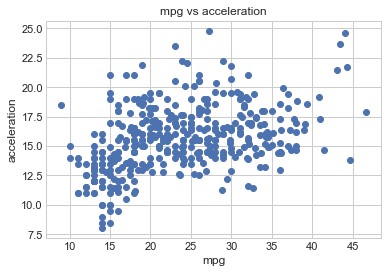

In [50]:
plt.scatter(x=df_cars['mpg'], y=df_cars['acceleration'])
plt.title('mpg vs acceleration')
plt.xlabel('mpg')
plt.ylabel('acceleration')
plt.show()

In [51]:
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
corr, _ = pearsonr(df_cars['mpg'], df_cars['acceleration'])
print('Pearsons correlation between `mpg` & `acceleration`: %.3f' % corr)

Pearsons correlation between `mpg` & `acceleration`: -0.832


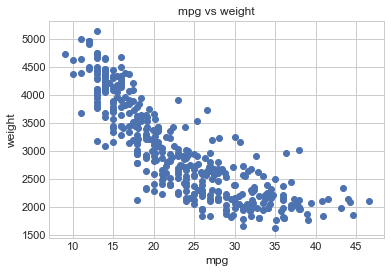

In [52]:
plt.scatter(x=df_cars['mpg'], y=df_cars['weight'])
plt.title('mpg vs weight')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

In [53]:
corr, _ = pearsonr(df_cars['mpg'], df_cars['weight'])
print('Pearsons correlation between `mpg` & `weight`: %.3f' % corr)

Pearsons correlation between `mpg` & `weight`: -0.832


#### Nonparameteric Correlation Analysis
You can use nonparametric correlation analysis to find correlation between categorical, nonlinearly, non-normally distributed variables.
* **Spearman's rank correlation**: Finds the R correlation between variable-pairs of ordinal data type.
    * R=1: Strong positive relationship
    * R=0: No relationship
    * R=1: Strong negative relationship
* **Chi-square tables**: Test if two variables are independent or not
    * p< 0.05: Reject nul hypothesis and conclude that the variables are correlated.
    * p > 0.05: Accept null hypothesis and conclude that the variable are independent.

In [56]:
from scipy.stats import spearmanr

In [58]:
plt.rcParams['figure.figsize'] = (14, 7)

In [71]:
df_cars['weight_bins'] = pd.qcut(df_cars['weight'], q=10)
df_cars['mpg_bins'] = pd.qcut(df_cars['mpg'], q=10)

In [72]:
cyl_serials = df_cars['cylinders']
weight_bins_serials = df_cars['weight_bins']
mpg_bins_serials = df_cars['mpg_bins']

In [74]:
spearmanr_coeff, p_value = spearmanr(cyl_serials, weight_bins_serials)
print(f'Spearman Rank Correlation Coefficient (cyl vs weight_bins): {spearmanr_coeff:.02f}')

Spearman Rank Correlation Coefficient (cyl vs weight_bins): 0.87


In [76]:
spearmanr_coeff, p_value = spearmanr(cyl_serials, mpg_bins_serials)
print(f'Spearman Rank Correlation Coefficient (cyl vs mpg_bins_serials): {spearmanr_coeff:.02f}')

Spearman Rank Correlation Coefficient (cyl vs mpg_bins_serials): -0.82


Let's back to Titantic dataset, 

In [78]:
titanic_df.sample(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S


In [80]:
table = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

In [81]:
table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [82]:
chi2, p, dof, expected = chi2_contingency(table.values)

In [84]:
print(f'Chi-square statistics {chi2:.02f} with p_value as {p:.05f}')

Chi-square statistics 260.72 with p_value as 0.00000


p< 0.05: Reject nul hypothesis and conclude that the variables `survived` and `sex` are correlated.

#### By heatmap

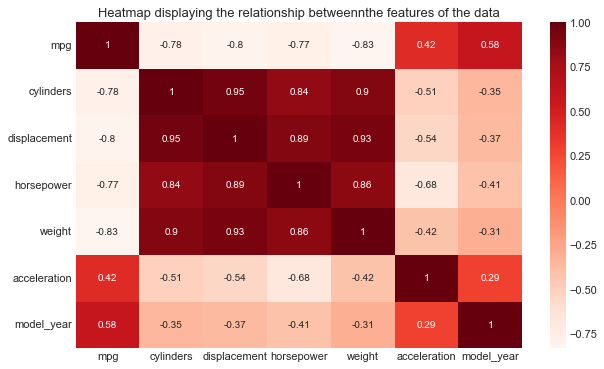

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data', fontsize=13)
plt.show()

Relationship between the Miles Per Gallon (mpg) and the other features:
* **Strong Negative correlation** between mpg with `displacement`, `horsepower`, `weight`, and `cylinders`.
    * This implies that, as any one of those variables increases, the `mpg` decreases.
* **Strong Positive correlations** among the `displacement`, `horsepower`, `weight` and `cylinders`.
    * This violates the non-multicollinearity assumption of Linear regression.
    * [**Multicollinearity**](https://en.wikipedia.org/wiki/Multicollinearity) hinders the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.
The other variables.ie.acceleration, model, and origin are NOT highly correlated with each other.

## <font color='darkblue'>Supplement</font>
* [Medium - Skewness & Kurtosis Simplified](https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85)
* [Medium - Skewness And Kurtosis In Machine Learning](https://vivekrai1011.medium.com/skewness-and-kurtosis-in-machine-learning-c19f79e2d7a5)
* [Analytics - Exploratory Data Analysis (EDA) – A step by step guide](https://www.analyticsvidhya.com/blog/2021/05/exploratory-data-analysis-eda-a-step-by-step-guide/)
* [Medium - 7 Ways to Handle Missing Values in Machine Learning](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)
* [Medium - Categorical Feature Encoding](https://towardsdatascience.com/categorical-feature-encoding-547707acf4e5)
* [Kaggle - Titanic - Feature understanding from Plots](https://www.kaggle.com/code/saisivasriram/titanic-feature-understanding-from-plots/notebook)
* [Binning Data with Pandas qcut and cut](https://pbpython.com/pandas-qcut-cut.html)